# IT350 (Data Analytics) - Assignment 1

Name: Sachin Prasanna

Roll no.: 211IT058


In [533]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Preprocessing the Dataset

In [534]:
df_1 = pd.read_csv('data/ratings_small.csv', header=None)

In [535]:
movies = df_1[1].unique()
users = df_1[0].unique()

df = pd.DataFrame(index=users, columns=movies)

for index, row in df_1.iterrows():
    df.at[row[0], row[1]] = row[2]

In [536]:
df.head()

,movieId,31,1029,1061,1129,1172,1263,1287,1293,1339,...,134528,134783,137595,138204,60832,64997,72380,129,4736,6425
userId,rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2.5,3.0,3.0,2.0,4.0,2.0,2.0,2.0,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [537]:
df = df.iloc[1:]
df = df.drop(columns='movieId', errors='ignore')

In [538]:
df = df.astype(float)

In [539]:
df.describe()

,31,1029,1061,1129,1172,1263,1287,1293,1339,1343,...,134528,134783,137595,138204,60832,64997,72380,129,4736,6425
count,42.000000,42.000000,33.000000,48.000000,46.000000,48.000000,46.000000,46.000000,52.000000,39.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,3.178571,3.702381,3.545455,3.312500,4.260870,3.864583,3.891304,3.978261,3.298077,3.743590,...,3.5,3.0,3.0,3.5,3.0,2.5,3.5,3.0,1.0,1.0
std,0.839726,0.869956,0.774230,0.809682,0.880272,1.109627,1.095004,0.924701,1.039700,0.818148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.500000,1.500000,2.000000,1.000000,2.000000,0.500000,0.500000,1.500000,1.000000,2.000000,...,3.5,3.0,3.0,3.5,3.0,2.5,3.5,3.0,1.0,1.0
25%,3.000000,3.000000,3.000000,3.000000,4.000000,3.375000,3.000000,3.500000,3.000000,3.250000,...,3.5,3.0,3.0,3.5,3.0,2.5,3.5,3.0,1.0,1.0
50%,3.000000,4.000000,3.500000,3.000000,4.500000,4.000000,4.000000,4.000000,3.500000,4.000000,...,3.5,3.0,3.0,3.5,3.0,2.5,3.5,3.0,1.0,1.0
75%,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.500000,4.000000,4.000000,...,3.5,3.0,3.0,3.5,3.0,2.5,3.5,3.0,1.0,1.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,3.5,3.0,3.0,3.5,3.0,2.5,3.5,3.0,1.0,1.0


In [540]:
df.isnull().sum().sum()

5983282

# Visualising the Null values in features using a table

In [541]:
# Displaying a table for null values
null_table = df.isnull().sum().to_frame(name='Null Count')

# Adding statistics for non-null values
null_table['Non-Null Count'] = len(df) - null_table['Null Count']
null_table['% Non-Null'] = null_table['Non-Null Count'] / len(df) * 100
null_table['Minimum'] = df.min()
null_table['Maximum'] = df.max()
null_table['Mean'] = df.mean()
null_table['25th Percentile'] = df.quantile(0.25)
null_table['50th Percentile (Median)'] = df.median()
null_table['75th Percentile'] = df.quantile(0.75)

# Displaying the table
null_table

,Null Count,Non-Null Count,% Non-Null,Minimum,Maximum,Mean,25th Percentile,50th Percentile (Median),75th Percentile
31,629,42,6.259314,1.5,5.0,3.178571,3.0,3.0,4.0
1029,629,42,6.259314,1.5,5.0,3.702381,3.0,4.0,4.0
1061,638,33,4.918033,2.0,5.0,3.545455,3.0,3.5,4.0
1129,623,48,7.153502,1.0,5.0,3.312500,3.0,3.0,4.0
1172,625,46,6.855440,2.0,5.0,4.260870,4.0,4.5,5.0
...,...,...,...,...,...,...,...,...,...
64997,670,1,0.149031,2.5,2.5,2.500000,2.5,2.5,2.5
72380,670,1,0.149031,3.5,3.5,3.500000,3.5,3.5,3.5
129,670,1,0.149031,3.0,3.0,3.000000,3.0,3.0,3.0
4736,670,1,0.149031,1.0,1.0,1.000000,1.0,1.0,1.0


# Visualising Null Values of features using graphs

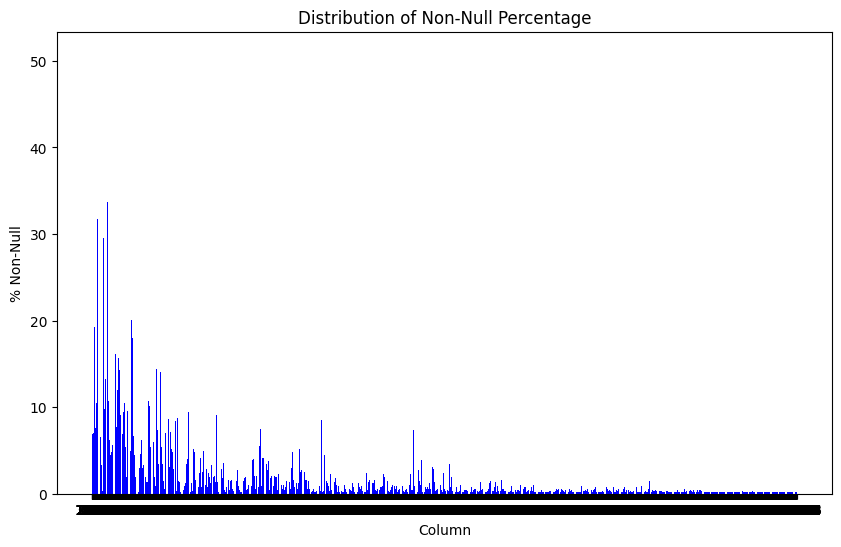

In [542]:
# Plotting the distribution of non-null percentage values
plt.figure(figsize=(10, 6))
plt.bar(null_table.index, null_table['% Non-Null'], color='blue')
plt.title('Distribution of Non-Null Percentage')
plt.xlabel('Column')
plt.ylabel('% Non-Null')
plt.show()

In [543]:
i = 0
no_of_columns_with_percentages = []
no_of_columns_with_percentages.append(0)

while i < 40:
    columns_in_range = null_table[
        (null_table['% Non-Null'] >= i) & (null_table['% Non-Null'] < i+1)
    ].index

    no_of_columns_with_percentages.append(len(columns_in_range))
    i += 1

In [544]:
print(no_of_columns_with_percentages)

[0, 6272, 1057, 490, 297, 208, 146, 97, 102, 60, 55, 33, 39, 23, 19, 19, 25, 16, 10, 20, 10, 4, 9, 5, 6, 3, 2, 4, 0, 4, 9, 2, 1, 5, 3, 1, 1, 2, 0, 1, 0]


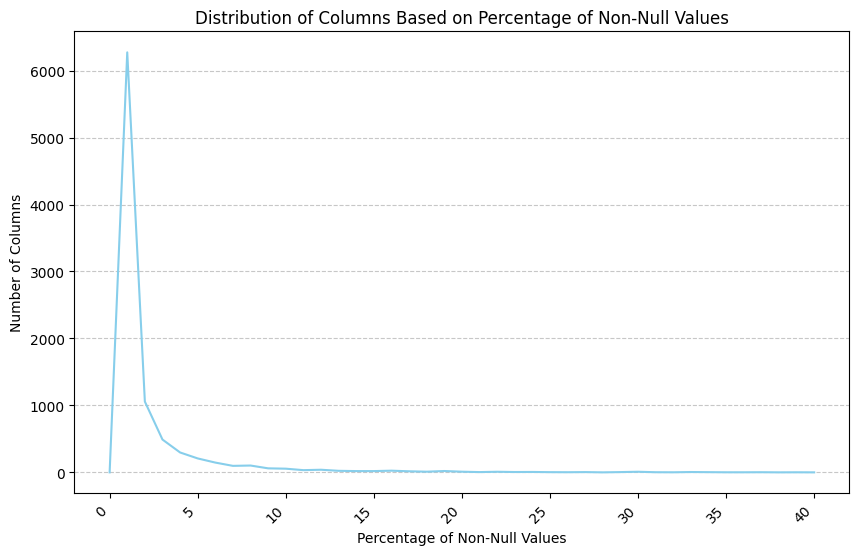

In [545]:
# Plotting a graph between percentage of non-null values and number of columns
plt.figure(figsize=(10, 6))
plt.plot(no_of_columns_with_percentages, linestyle='-', color='skyblue')
plt.title('Distribution of Columns Based on Percentage of Non-Null Values')
plt.xlabel('Percentage of Non-Null Values')
plt.ylabel('Number of Columns')
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [546]:
cumulative_percentages = []
cumulative_percentages.append(0)

i = 0
while i < 40:
    curr_percentage = (no_of_columns_with_percentages[i]/len(df.columns))*100
    cumulative_percentages.append(curr_percentage + cumulative_percentages[i])
    i += 1

# removing the first 2 elements
cumulative_percentages = cumulative_percentages[2:]

In [547]:
print(cumulative_percentages)

[69.18155746746083, 80.84050297816015, 86.24531215530553, 89.52128833002426, 91.81557467460843, 93.42598720494153, 94.49591881756011, 95.62100154423119, 96.28281491286124, 96.88947716743878, 97.2534745201853, 97.68365320979484, 97.93734833443636, 98.14692256783587, 98.35649680123538, 98.6322523714979, 98.80873593646591, 98.91903816457092, 99.13964262078093, 99.24994484888595, 99.29406574012795, 99.39333774542246, 99.44848885947496, 99.51467019633797, 99.54776086476947, 99.56982131039048, 99.61394220163248, 99.61394220163248, 99.65806309287449, 99.757335098169, 99.77939554379, 99.7904257666005, 99.84557688065301, 99.87866754908451, 99.88969777189502, 99.90072799470552, 99.92278844032653, 99.92278844032653, 99.93381866313703]


In [548]:
# Finding the threshold percentage of coloumns to drop. Retaining the top 1% of the columns, which have the most non-null values
i = 0
while i < len(cumulative_percentages):
    if cumulative_percentages[i] >= 99:
        print(i)
        break
    i += 1

len(df.columns) - cumulative_percentages[i]*len(df.columns)/100

18


78.00000000000182

# Dropping the features which has more than 81% null values

In [549]:
# dropping all the columns with more than 81% null values (since i was 18)
threshold = 0.81
df = df.dropna(axis=1, thresh=int((1 - threshold) * len(df)))

In [550]:
print(df.shape)
print(df.isnull().sum().sum())

(671, 80)
39018


# Visualising the Null values in instances using a table

In [551]:
df_transposed = df.T

# Displaying a table of null values for rows
null_table_rows = df_transposed.isnull().sum().to_frame(name='Null Count')

# Adding statistics for non-null values for rows
null_table_rows['Non-Null Count'] = len(df_transposed) - null_table_rows['Null Count']
null_table_rows['% Non-Null'] = null_table_rows['Non-Null Count'] / len(df_transposed) * 100
null_table_rows['Minimum'] = df_transposed.min()
null_table_rows['Maximum'] = df_transposed.max()
null_table_rows['Mean'] = df_transposed.mean()
null_table_rows['25th Percentile'] = df_transposed.quantile(0.25)
null_table_rows['50th Percentile (Median)'] = df_transposed.median()
null_table_rows['75th Percentile'] = df_transposed.quantile(0.75)

# Displaying the table for rows
null_table_rows

,Null Count,Non-Null Count,% Non-Null,Minimum,Maximum,Mean,25th Percentile,50th Percentile (Median),75th Percentile
1,80,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN
2,59,21,26.25,3.0,5.0,3.761905,3.0,4.0,4.000
3,58,22,27.50,2.0,5.0,3.613636,3.0,3.5,4.375
4,47,33,41.25,3.0,5.0,4.818182,5.0,5.0,5.000
5,58,22,27.50,2.5,5.0,3.727273,3.5,4.0,4.000
...,...,...,...,...,...,...,...,...,...
667,65,15,18.75,2.0,5.0,3.666667,3.0,4.0,4.000
668,73,7,8.75,3.0,5.0,4.571429,4.5,5.0,5.000
669,76,4,5.00,3.0,5.0,4.000000,3.0,4.0,5.000
670,63,17,21.25,1.0,5.0,3.941176,3.0,4.0,5.000


# Visualising the Null values in instances using graphs

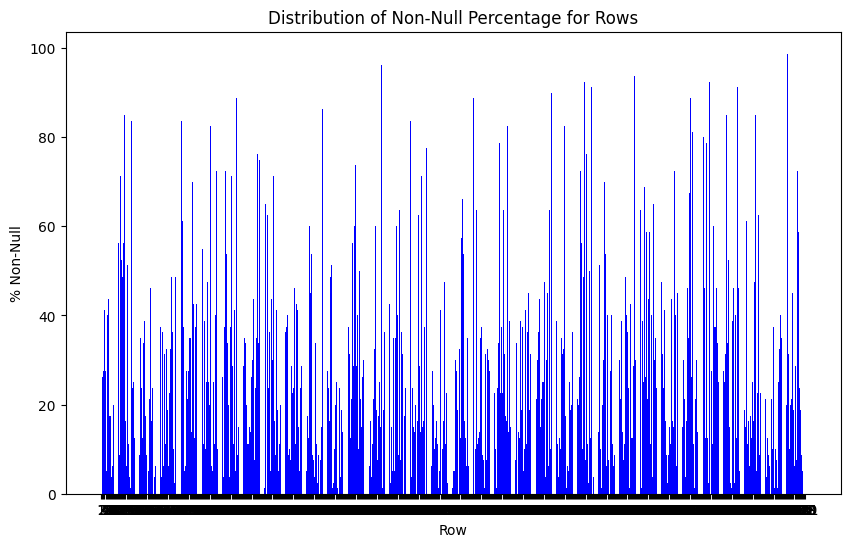

In [552]:
# Plotting the distribution of non-null percentage values for rows
plt.figure(figsize=(10, 6))
plt.bar(null_table_rows.index, null_table_rows['% Non-Null'], color='blue')
plt.title('Distribution of Non-Null Percentage for Rows')
plt.xlabel('Row')
plt.ylabel('% Non-Null')
plt.show()

In [553]:
i = 0
no_of_rows_percentages = []
no_of_rows_percentages .append(0)

while i < 100:
    rows_in_range = null_table_rows[
        (null_table_rows['% Non-Null'] >= i) & (null_table_rows['% Non-Null'] < i+1)
    ].index

    no_of_rows_percentages .append(len(rows_in_range))
    i += 1

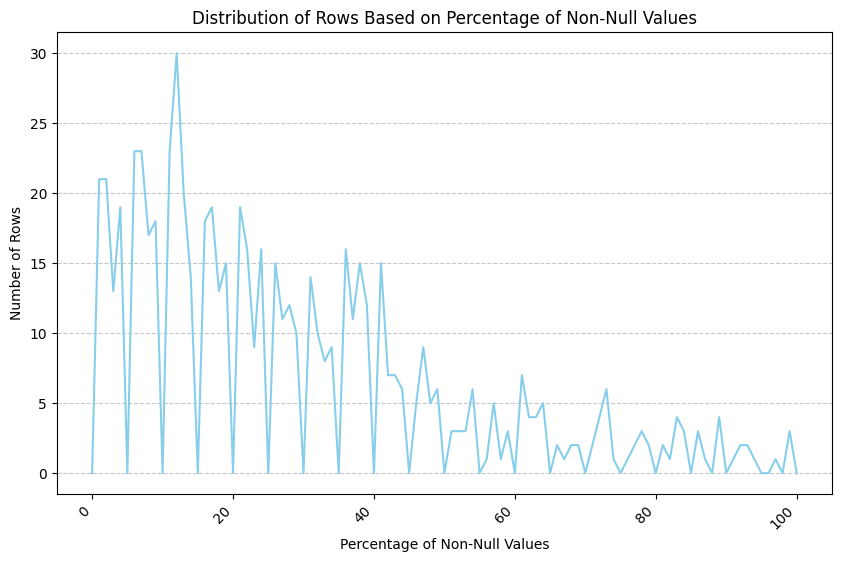

In [554]:
plt.figure(figsize=(10, 6))
plt.plot(range(101), no_of_rows_percentages, linestyle='-', color='skyblue')
plt.title('Distribution of Rows Based on Percentage of Non-Null Values')
plt.xlabel('Percentage of Non-Null Values')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [555]:
cumulative_percentages_rows = []
cumulative_percentages_rows.append(0)

i = 0
while i < 100:
    curr_percentage_rows = (no_of_rows_percentages[i]/671)*100  # 671 is the number of rows
    cumulative_percentages_rows.append(curr_percentage_rows + cumulative_percentages_rows[i])
    i += 1

# Removing the first element
cumulative_percentages_rows = cumulative_percentages_rows[2:]

In [556]:
print(cumulative_percentages_rows)

[3.129657228017884, 6.259314456035768, 8.196721311475411, 11.028315946348734, 11.028315946348734, 14.456035767511178, 17.883755588673623, 20.417287630402384, 23.09985096870343, 23.09985096870343, 26.527570789865873, 30.99850968703428, 33.97913561847988, 36.0655737704918, 36.0655737704918, 38.74813710879285, 41.57973174366617, 43.51713859910581, 45.75260804769002, 45.75260804769002, 48.584202682563344, 50.968703427719824, 52.30998509687034, 54.69448584202682, 54.69448584202682, 56.929955290611026, 58.56929955290611, 60.357675111773474, 61.847988077496275, 61.847988077496275, 63.9344262295082, 65.424739195231, 66.61698956780924, 67.95827123695976, 67.95827123695976, 70.34277198211625, 71.98211624441133, 74.21758569299553, 76.00596125186289, 76.00596125186289, 78.24143070044708, 79.28464977645305, 80.32786885245902, 81.2220566318927, 81.2220566318927, 81.9672131147541, 83.30849478390462, 84.05365126676602, 84.9478390461997, 84.9478390461997, 85.39493293591654, 85.84202682563338, 86.289120

In [557]:
i = 0

while i < len(cumulative_percentages_rows):
    if cumulative_percentages_rows[i] >= 50:
        print(i)
        break
    i += 1

671 - cumulative_percentages_rows[i]*671/100

21


329.0

# Dropping the instances which has more than 79% null values

In [558]:
# retaining all those people who have atleast rated around 16 movies from the 80 movies
threshold_rows = 0.79
df = df.dropna(axis=0, thresh=int((1 - threshold_rows) * len(df.columns)))

# Displaying the resulting DataFrame
df.shape

(364, 80)

In [559]:
df.isnull().sum().sum()

16675

# Filling the remaining NaN values with 0 (user did not like the movie)

In [560]:
#imputing the missing values with 0 (this means user does not like the movie at all)
df = df.fillna(0)

In [561]:
df.describe()

,47,50,110,150,153,165,296,356,364,367,...,1704,3578,4226,4886,4993,608,733,3793,648,6539
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,2.001374,1.991758,2.252747,1.928571,0.868132,1.232143,3.081044,3.142857,1.865385,1.269231,...,1.495879,1.489011,1.217033,1.173077,1.979396,1.822802,1.094780,1.054945,1.236264,1.270604
std,2.116932,2.228339,2.104205,2.030513,1.383363,1.726981,2.032355,1.844560,1.981946,1.636040,...,2.031599,2.006845,1.959546,1.839344,2.198544,2.178546,1.740365,1.701483,1.753141,1.879347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.500000,4.000000,4.000000,2.000000,3.000000,5.000000,4.500000,4.000000,3.000000,...,4.000000,4.000000,3.500000,3.125000,4.500000,4.000000,3.000000,2.625000,3.000000,3.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Plotting a Correlation Heat Map to visualise the Data (Multi Dimensional Visualisation)

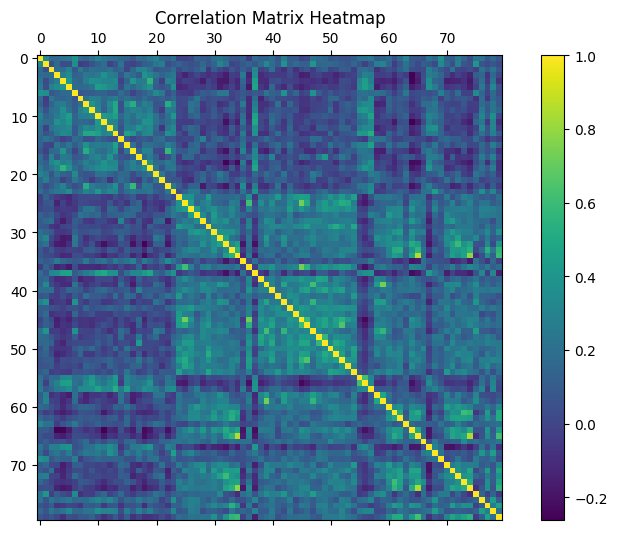

In [562]:
# generating a heatmap for the correlation matrix (mul)
plt.figure(figsize=(10, 6))
plt.matshow(df.corr(), fignum=1)
plt.title('Correlation Matrix Heatmap')
plt.colorbar()
plt.show()

In [563]:
# finding the covaraince matrix
cov_matrix = df.cov()

# Storing each covariance value in a list
cov_values = []
for i in range(len(cov_matrix.columns)):
    for j in range(i+1, len(cov_matrix.columns)):
        cov_values.append(cov_matrix.iloc[i, j])

print(cov_values)

[1.6205347682620421, 0.80199346108437, 0.7700708382526563, 0.6441210304846666, 0.9314984258166076, 1.6231666061211512, 0.7256985438803627, 0.58145263827082, 0.751006569188387, 1.2091147488874758, 1.018373671782763, 0.8368525413979951, 0.7295280477098661, 0.7798508309871951, 0.47584423152604993, 0.30658924408924393, 0.8362943874307506, 0.7502875911966825, 0.9220192686101782, 1.3363322283776835, 0.770716026397844, 0.5459862107589387, 0.6852787364150996, -0.04899835013471374, -0.07024793388429701, 0.05281082553809817, 0.5209884812157539, 0.4686052583779859, 0.34252111524838785, 0.8860779372143002, 1.0263751400115038, 0.7523423546150817, 0.33786289468107633, 0.3723303211939575, 0.5505006357279074, -0.20402324947779488, 0.7400705355250814, 0.5738636363636367, 0.6428495746677565, 0.7934149184149181, 0.26976811067720197, 1.180054793691158, 0.4374413465322555, 0.46902340084158267, -0.04305353737171856, 0.12516839221384649, 0.9211318984046262, 0.7544557715012266, 0.6727401386492289, 0.261626630

# Covariance Data

So many coloumns are correlated, as we can see in the results below.

This means we can reduce our dimensions, to lesser dimensions, where the covariance between the features are lesser and we can capture the data more compactly.

Additionally, certain features may be redundant and not significantly contribute to the understanding of the data. Therefore, it is needed to employ dimensionality reduction techniques to identify and eliminate such features, enhancing the efficiency of data representation.

In [564]:
mean_covariance = np.mean(cov_values)
percentile_25 = np.percentile(cov_values, 25)
percentile_50 = np.percentile(cov_values, 50)  # Median
percentile_75 = np.percentile(cov_values, 75)
std_deviation = np.std(cov_values)

# Displaying the results
print("Mean Covariance:", mean_covariance)
print("25th Percentile:", percentile_25)
print("50th Percentile (Median):", percentile_50)
print("75th Percentile:", percentile_75)
print("Standard Deviation:", std_deviation)

Mean Covariance: 0.5448440009357731
25th Percentile: 0.09687566221657104
50th Percentile (Median): 0.5093117110162563
75th Percentile: 0.9334775073411435
Standard Deviation: 0.6178865573320116


# PCA - Principle Component Analysis

The number of components can be selected using various methods.

One method can be selecting those components who contribute to 80% variance of the total data.

Another method can be using the kaiser creterion, where the components corresponding to the eigenvalues which are greater than the average eigenvalues are retained.

Another approach is the scree plot, which involves plotting the eigenvalues against the component number. The "elbow" of the plot is examined, and components before the elbow are retained. This method helps in visually identifying the point where additional components contribute less to the overall variance.

In this notebook, the Kaiser Creterion is used.

In [565]:
def pca(X):

    # Standardizing the data
    X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # Computing the covariance matrix
    covariance_matrix = np.cov(X_standardized, rowvar=False)

    # Computing eigenvectors and eigenvalues of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sorting the eigenvalues in descending order and the eigenvectors will rearrange accordingly.
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Calculating the variances explained by each principal component
    principle_component_matrix = np.dot(X_standardized, eigenvectors)
    variances = principle_component_matrix.var(axis=0)

    # Calculating the cumulative explained variance
    cumulative_variance = np.cumsum(variances) / np.sum(variances)

    #Plot a Scree Plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), variances, marker='o', color='b')
    plt.title('Scree Plot')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Variances')
    plt.grid(True)
    plt.show()

    # Plot a Cumulative Explained Variance Plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='b')
    plt.title('Cumulative Explained Variance Plot')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.show()

    # Selecting Principle Components based on the variance explained (greater than 80%)
    #num_components = np.sum(cumulative_variance < 0.80) + 1

    # Selecting Principle Components based on the Kaiser criterion
    average_eigenvalues = np.mean(eigenvalues)
    num_components = np.sum(eigenvalues > average_eigenvalues)

    # Selecting the top k eigenvectors (the principal components)
    selected_eigenvectors = eigenvectors[:, :num_components]

    # Projecting the data onto the new subspace
    projected_data = np.dot(X_standardized, selected_eigenvectors)

    return projected_data, selected_eigenvectors

In [566]:
def pca_components_given(X, num_components):

    # Standardizing the data
    X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # Computing the covariance matrix
    covariance_matrix = np.cov(X_standardized, rowvar=False)

    # Computing eigenvectors and eigenvalues of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sorting the eigenvalues in descending order and the eigenvectors will rearrange accordingly.
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Calculating the variances explained by each principal component
    principle_component_matrix = np.dot(X_standardized, eigenvectors)
    variances = principle_component_matrix.var(axis=0)

    # Calculating the cumulative explained variance
    cumulative_variance = np.cumsum(variances) / np.sum(variances)

    # Selecting the top k eigenvectors (the principal components)
    selected_eigenvectors = eigenvectors[:, :num_components]

    # Projecting the data onto the new subspace
    projected_data = np.dot(X_standardized, selected_eigenvectors)

    return projected_data, selected_eigenvectors

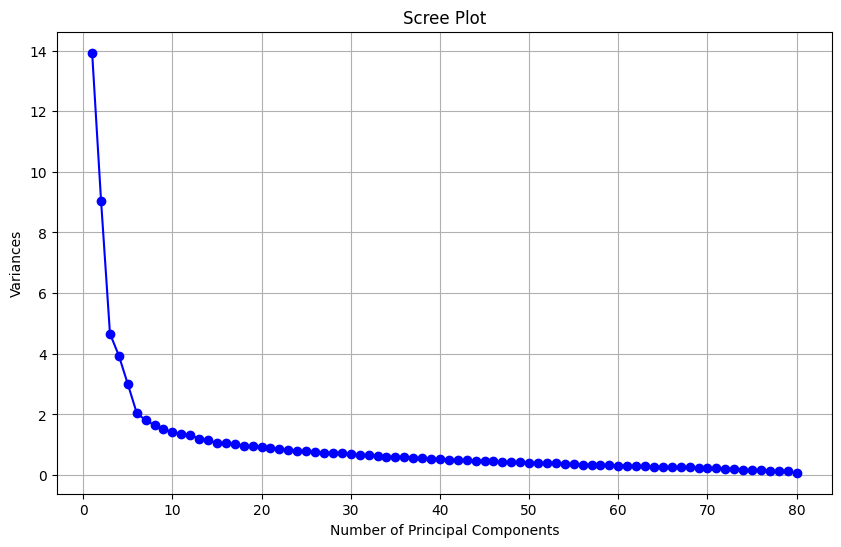

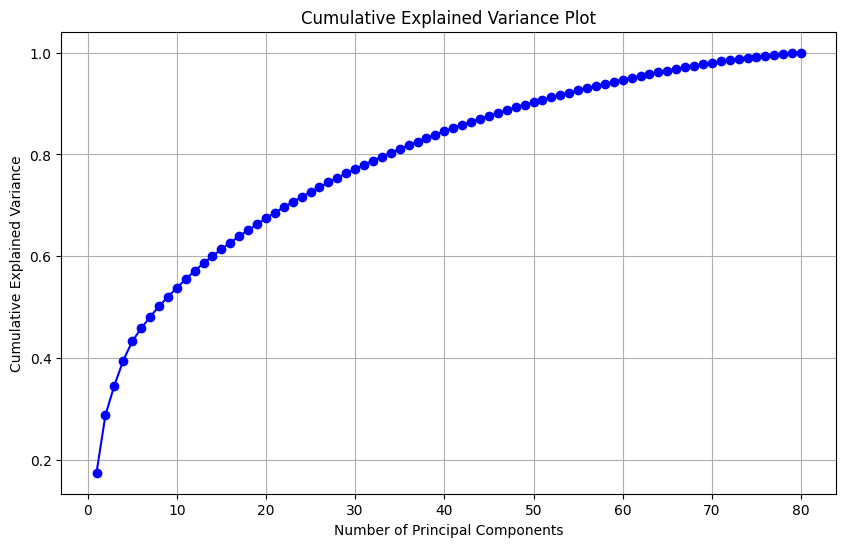

In [567]:
projected_data, selected_eigenvectors = pca(df)

In [568]:
print(selected_eigenvectors)

[[-0.07426217  0.12469298 -0.06512259 ... -0.1179604  -0.09881795
   0.03326703]
 [-0.08262757  0.04175327 -0.20008002 ... -0.16577802 -0.05421287
  -0.24820968]
 [-0.03521031  0.12036938  0.05273529 ... -0.1054055  -0.0166525
   0.10423432]
 ...
 [-0.13456438 -0.00935454  0.16499931 ...  0.12775191  0.02707059
  -0.11765036]
 [-0.08964031  0.15532497  0.06047556 ...  0.06741241  0.0077273
   0.01580299]
 [-0.14430089 -0.03870856  0.2235779  ... -0.08204193 -0.14646176
  -0.09852361]]


In [569]:
print(projected_data.shape)

(364, 17)


In [570]:
print(projected_data)

[[ 5.03950829  2.64445935  0.04061231 ... -0.45890782 -0.85890773
  -0.89562496]
 [ 2.45484681 -1.89502485  0.54987071 ... -0.60296578  0.23045956
   2.71469118]
 [-2.45663888  0.24188722 -3.08964849 ... -0.54297838 -1.7128754
   0.48185084]
 ...
 [ 5.51842511  1.21437548  0.33067254 ...  0.72603326  0.65655166
  -0.05278932]
 [ 3.76900346 -1.89954291 -1.86083471 ...  0.65608577 -0.98638963
  -1.87071858]
 [-1.89530717 -3.28181079  0.97483503 ... -0.22972171 -1.82739502
  -0.63457699]]


In [571]:
print(selected_eigenvectors.shape)    # selected top 17 eigenvectors according to the kaiser creterion

(80, 17)


In [572]:
def reconstruction_error(original_data, projected_data, selected_eigenvectors):
    # Reconstruct the data from the projected_data using the selected eigenvectors
    reconstructed_data = np.dot(projected_data, selected_eigenvectors.T)

    # Computing the reconstruction error
    errors = np.square(np.subtract(original_data, reconstructed_data)).mean()

    return errors

In [573]:
df_standardized = (df - np.mean(df, axis=0)) / np.std(df, axis=0)

error = reconstruction_error(df_standardized, projected_data, selected_eigenvectors)
print(f'Reconstruction Error:\n\n {error}')

Reconstruction Error:

 47      0.431424
50      0.392132
110     0.333199
150     0.412374
153     0.347915
          ...   
608     0.356642
733     0.374374
3793    0.352476
648     0.445877
6539    0.303355
Length: 80, dtype: float64


In [574]:
reconstructed_data = np.dot(projected_data, selected_eigenvectors.T)

standard_deviations = np.std(df, axis=0)
means = np.mean(df, axis=0)

for i in range(reconstructed_data.shape[1]):
    reconstructed_data[:, i] = reconstructed_data[:, i] * standard_deviations[i] + means[i]

In [575]:
reconstructed_data = pd.DataFrame(reconstructed_data, columns=df.columns)
reconstructed_data = np.round(reconstructed_data * 2) / 2

In [576]:
df = df.reset_index(drop=True)

# Trying to reconstruct the data using varying Principle Components

In [577]:
def accuracy_plot(df, df_standardized, standard_deviations, means):

    accuracy_list = []
    for components in range (1, 81):

        projected_data, selected_eigenvectors = pca_components_given(df, components)
        reconstructed_data = np.dot(projected_data, selected_eigenvectors.T)

        for i in range(reconstructed_data.shape[1]):
            reconstructed_data[:, i] = reconstructed_data[:, i] * standard_deviations[i] + means[i]
        
        reconstructed_data = pd.DataFrame(reconstructed_data, columns=df.columns)
        reconstructed_data = np.round(reconstructed_data * 2) / 2

        number_correct = (df == reconstructed_data).sum().sum()
        accuracy = number_correct/(364*80)

        accuracy_list.append(accuracy)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 81), accuracy_list, marker='o', color='b')
    plt.title('Accuracy Plot')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Accuracy of Reconstruction')
    plt.grid(True)
    plt.show()

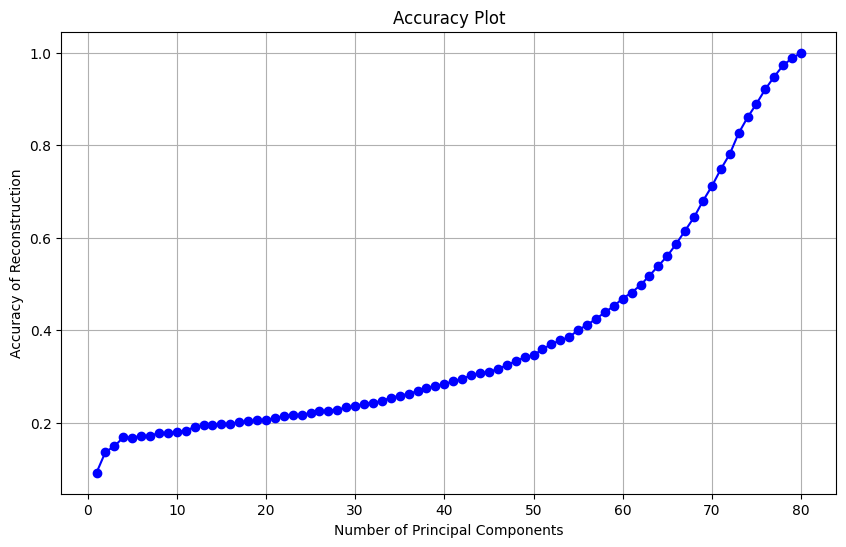

In [578]:
accuracy_plot(df, df_standardized, standard_deviations, means)

# Plotting the error encountered in reconstructing the data back using the Principle Components

In [579]:
def error_plot(df, df_standardized, standard_deviations, means):
    
    error_list = []
    
    for components in range (1, 81):

        projected_data, selected_eigenvectors = pca_components_given(df, components)
        error = reconstruction_error(df_standardized, projected_data, selected_eigenvectors)
        average_error = error.mean()
        error_list.append(average_error)
        
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 81), error_list, marker='o', color='b')
    plt.title('Error Plot')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Average Reconstruction Error')
    plt.grid(True)
    plt.show()

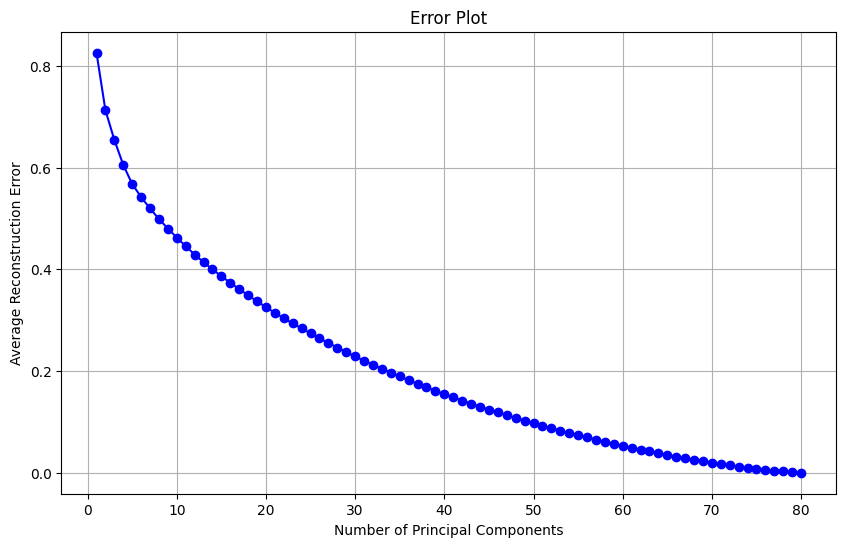

In [580]:
error_plot(df, df_standardized, standard_deviations, means)

# Projecting the data onto 2 dimensions

When projected onto 2 dimensions, the data does now show much of a correlation and is much spread of in both the directions of the principle components, hence maximising the variances and information retained

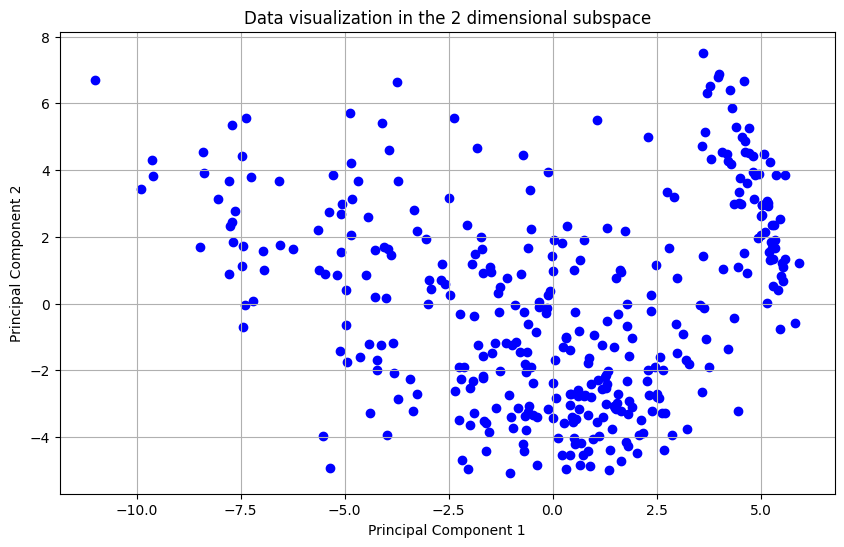

In [581]:
#PCA with 2 components
projected_data_2_dim, selected_eigenvectors = pca_components_given(df_standardized, 2)

# Plotting the data in the new subspace
plt.figure(figsize=(10, 6))
plt.scatter(projected_data_2_dim[:, 0], projected_data_2_dim[:, 1], marker='o', color='b')
plt.title('Data visualization in the 2 dimensional subspace')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Projecting the data onto 1 dimension

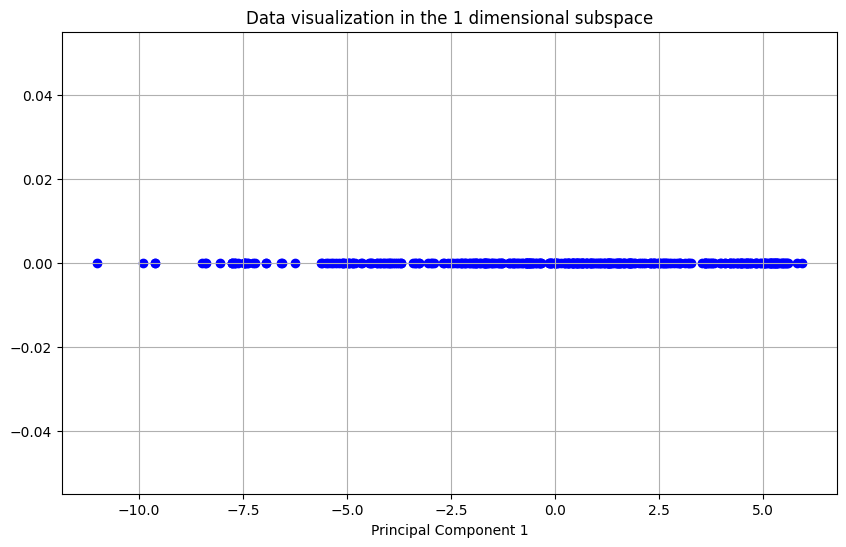

In [582]:
#PCA with 1 component
projected_data_1_dim, selected_eigenvectors = pca_components_given(df, 1)

# Plotting the data in the new subspace
plt.figure(figsize=(10, 6))
plt.scatter(projected_data_1_dim[:, 0], np.zeros(len(projected_data_1_dim)), marker='o', color='b')
plt.title('Data visualization in the 1 dimensional subspace')
plt.xlabel('Principal Component 1')
plt.grid(True)
plt.show()

# Plotting the t-sne plot for PCA using 2 dimensions

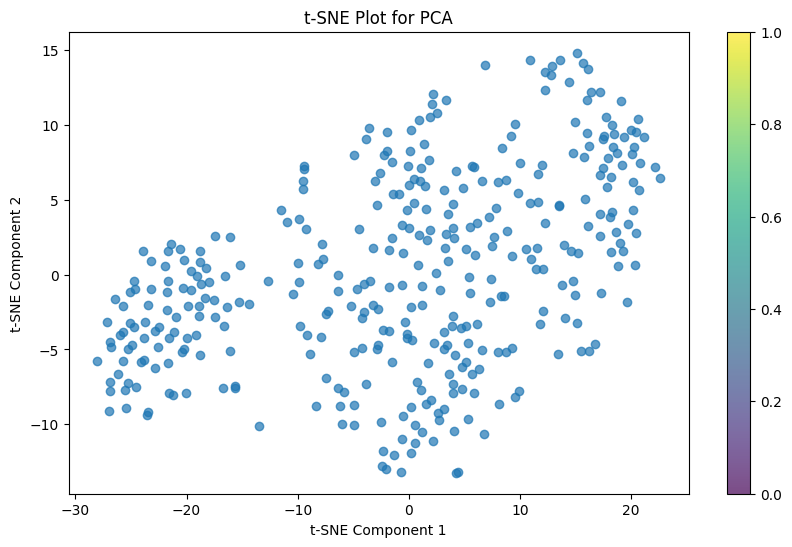

In [583]:
# Initialize t-SNE model
tsne = TSNE(n_components=2, random_state=42)

# Apply t-SNE to your data
tsne_result = tsne.fit_transform(projected_data)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap='viridis', alpha=0.7)
plt.title('t-SNE Plot for PCA')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()

# SVD - Singular Value Decomposition

In [584]:
def svd(A, tol=1e-10):
    # Compute the covariance matrix
    ATA = np.dot(A.T, A)

    # Computing eigenvalues and eigenvectors of ATA
    eigenvalues, V = np.linalg.eigh(ATA)

    # Sort eigenvalues in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    V = V[:, idx]

    # Computing the singular values
    singular_values = np.sqrt(eigenvalues)

    # Checking for small singular values and set them to zero
    set_nill = singular_values > tol
    singular_values = singular_values[set_nill]
    V = V[:, set_nill]

    # Computing the singular vectors
    U = np.dot(A, V) / singular_values

    return U, singular_values, V.T

In [585]:
U1, S1, V1 = svd(df_standardized.to_numpy())

print(U1.shape)
print(S1.shape)
print(V1.shape)

(364, 80)
(80,)
(80, 80)


# Rank approximation using SVD

In [586]:
def svd_approximation(U, S, V, A):

    # Finding all rank approximations
    rank_approximations = []

    for rank in range(1, len(S) + 1):

        # Rank approximation
        current_singular_value = S[rank-1]
        current_U = U[:, rank-1]
        current_V_t = V[rank-1, :]

        current_U = current_U * current_singular_value

        current_rank_approximation = np.outer(current_U, current_V_t)

        if(len(rank_approximations) == 0):
            rank_approximations.append(current_rank_approximation)

        else:
            rank_approximations.append(rank_approximations[rank-2] + current_rank_approximation)

    # Calcuating the error for each rank approximation
    errors = []
    for rank_approximation in rank_approximations:
        error = np.square(np.subtract(A, rank_approximation)).mean()
        error = error.mean()
        errors.append(error)
    
    return rank_approximations, errors

# Finding the optimal Rank using the Energy Method

In [587]:
def find_optimal_rank(s, threshold=0.80):

    # Calculate cumulative energy
    cumulative_energy = np.cumsum(s**2) / np.sum(s**2)

    # Find the optimal rank based on the threshold
    optimal_rank = np.argmax(cumulative_energy >= threshold) + 1

    return optimal_rank


In [588]:
k = find_optimal_rank(S1)
print(k)

34


# Plotting the error encountered using different rank approximations

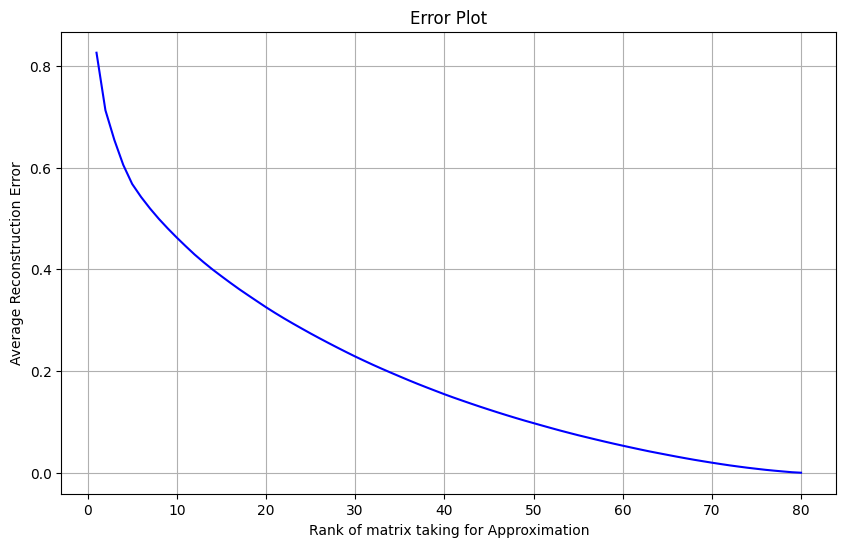

In [589]:
rank_approximations, errors = svd_approximation(U1, S1, V1, df_standardized)

#plotting the error plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 81), errors, color='b')
plt.title('Error Plot')
plt.xlabel('Rank of matrix taking for Approximation')
plt.ylabel('Average Reconstruction Error')
plt.grid(True)
plt.show()

Importance of standardising the data before giving it to SVD. Because standardised matrix rank approximations are much better


# Reducing Dimensions with SVD

In [590]:
def svd_reduction(U, S, V, A, features):

    S = np.zeros((A.shape[0], A.shape[1]))

    S[:A.shape[1], :A.shape[1]] = np.diag(S)

    S = S[:, : features]
    V = V[:features, :]

    # A is 364 x 80, V is 2 x 80
    projected_data = A.dot(V.T)

    return projected_data

In [591]:
svd_projected_data_17_dimensions = svd_reduction(U1, S1, V1, df_standardized, 17)

svd_projected_data_17_dimensions.shape

(364, 17)

In [592]:
print(svd_projected_data_17_dimensions)

           0         1         2         3         4         5         6   \
2    5.039508 -2.644459 -0.040612 -0.731877  0.685571 -0.329976 -0.496109   
3    2.454847  1.895025 -0.549871 -0.729186 -0.906882  1.959682  0.304753   
4   -2.456639 -0.241887  3.089648  6.167291 -2.643518 -1.590347  1.283501   
5    2.996477 -0.768985 -2.488373 -1.644162 -3.892452  1.105111  1.953797   
7    1.616854 -1.018322  0.566789  4.937488 -1.125759 -0.244377 -1.260462   
..        ...       ...       ...       ...       ...       ...       ...   
664 -7.208463 -0.076491 -0.503811 -0.575612  4.101043 -1.819944  0.897550   
665 -2.963270 -0.710073 -1.269990 -1.126464 -3.098360  1.427132 -0.451267   
666  5.518425 -1.214375 -0.330673 -0.646757 -0.055609 -0.079717 -0.410873   
670  3.769003  1.899543  1.860835 -1.524016 -0.036731  1.084585 -0.636506   
671 -1.895307  3.281811 -0.974835  0.438083 -0.963745 -0.708657 -2.549527   

           7         8         9         10        11        12        13  

In [593]:
svd_projected_data_17_dimensions = svd_projected_data_17_dimensions.to_numpy()

# Visualising the Matrices generated by SVD

Sigma matrix gives us the strength of our concepts.

V matrix maps the concepts to movies

U matrix maps the users to concepts

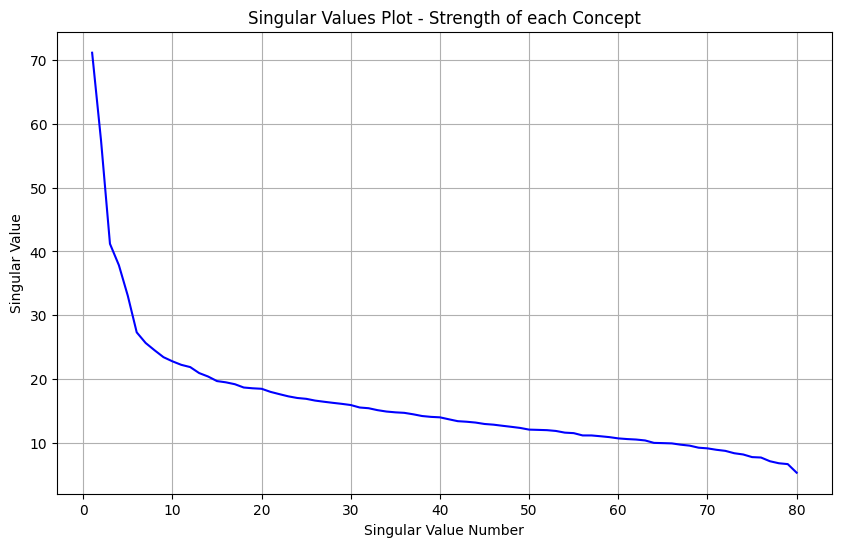

In [594]:
#plotting the singular values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 81), S1, color='b')
plt.title('Singular Values Plot - Strength of each Concept')
plt.xlabel('Singular Value Number')
plt.ylabel('Singular Value')
plt.grid(True)
plt.show()


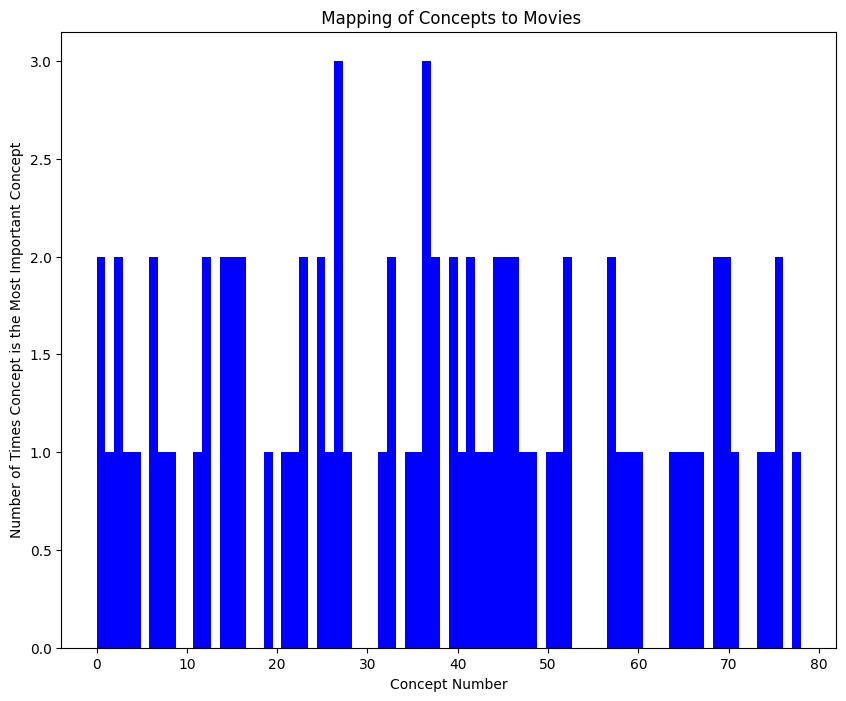

In [595]:
highest_concepts = []

for i in range(0, 80):
    # taking the most important concept. (highest absolute value)
    highest_concept = np.argmax(np.abs(V1[i, :]))
    highest_concepts.append(highest_concept)

# plotting a graph between concepts and the number of times they are the most important concept
plt.figure(figsize=(10, 8))
plt.hist(highest_concepts, bins=80, color='b')
plt.title(' Mapping of Concepts to Movies')
plt.xlabel('Concept Number')
plt.ylabel('Number of Times Concept is the Most Important Concept')
plt.show()

Relation between concept to movies

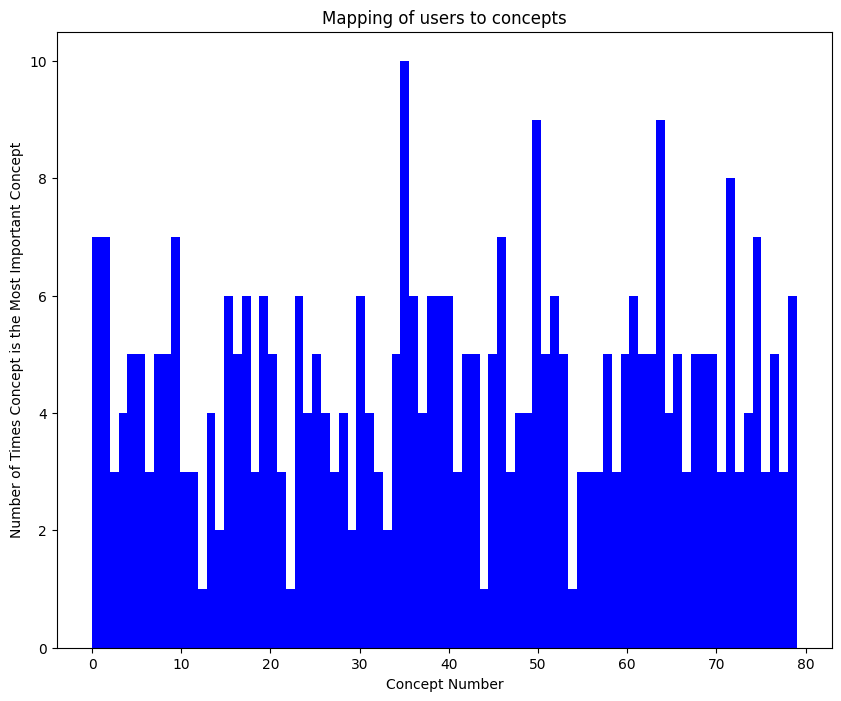

In [596]:
highest_concepts_1 = []

for i in range(0, 364):
    # taking the most important concept. (highest absolute value)
    highest_concept_1 = np.argmax(np.abs(U1[i, :]))
    highest_concepts_1.append(highest_concept_1)


# plotting a graph between concepts and the number of times they are the most important concept
plt.figure(figsize=(10, 8))
plt.hist(highest_concepts_1, bins=80, color='b')
plt.title('Mapping of users to concepts')
plt.xlabel('Concept Number')
plt.ylabel('Number of Times Concept is the Most Important Concept')
plt.show()


In [597]:
svd_projected_data_2dim = svd_reduction(U1, S1, V1, df_standardized, 2)

In [598]:
print(svd_projected_data_2dim)

            0         1
2    5.039508 -2.644459
3    2.454847  1.895025
4   -2.456639 -0.241887
5    2.996477 -0.768985
7    1.616854 -1.018322
..        ...       ...
664 -7.208463 -0.076491
665 -2.963270 -0.710073
666  5.518425 -1.214375
670  3.769003  1.899543
671 -1.895307  3.281811

[364 rows x 2 columns]


In [599]:
svd_projected_data_2dim.shape

(364, 2)

# Projecting the data onto 2 dimensions

Both the projections of SVD and PCA are identical, highlighting that PCA and SVD inherentely do the same thing.

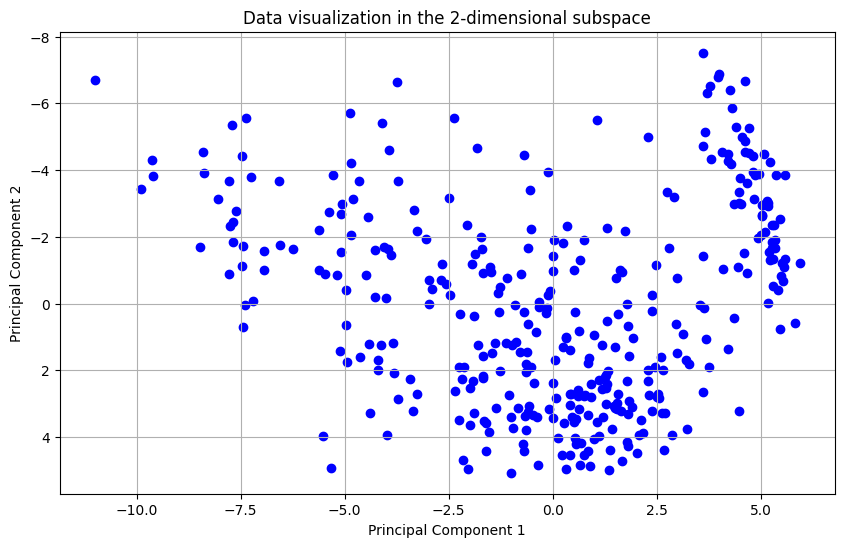

In [600]:
# making the svd_projected_data an array
svd_projected_data_2dim = svd_projected_data_2dim.to_numpy()

# Plotting the data in the new subspace
plt.figure(figsize=(10, 6))
plt.scatter(svd_projected_data_2dim[:, 0], svd_projected_data_2dim[:, 1], marker='o', color='b')
plt.title('Data visualization in the 2-dimensional subspace')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

In [601]:
svd_projected_data_1dim = svd_reduction(U1, S1, V1, df_standardized, 1)

In [602]:
print(svd_projected_data_1dim)

            0
2    5.039508
3    2.454847
4   -2.456639
5    2.996477
7    1.616854
..        ...
664 -7.208463
665 -2.963270
666  5.518425
670  3.769003
671 -1.895307

[364 rows x 1 columns]


# Projecting the data onto 1 dimension


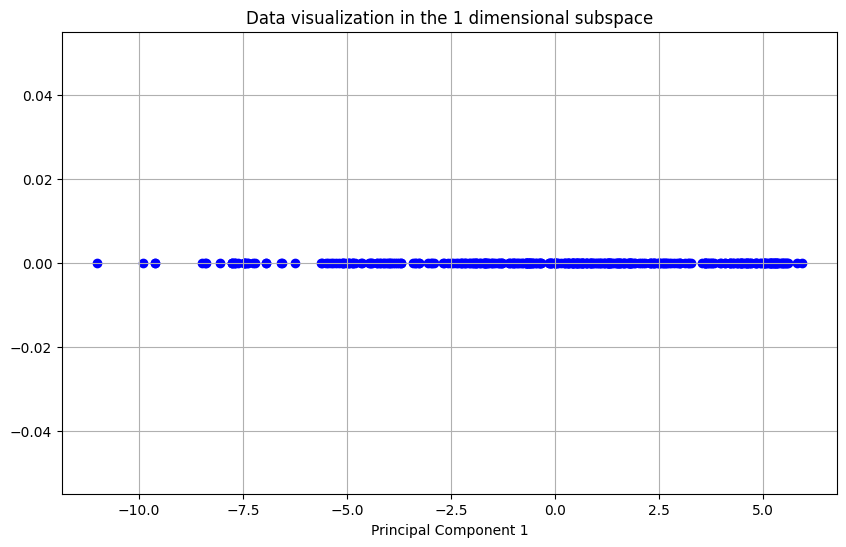

In [603]:
# make the svd_projected_data an array
svd_projected_data_1dim = svd_projected_data_1dim.to_numpy()

# Plotting the data in the new subspace
plt.figure(figsize=(10, 6))
plt.scatter(svd_projected_data_1dim[:, 0], np.zeros(len(svd_projected_data_1dim)), marker='o', color='b')
plt.title('Data visualization in the 1 dimensional subspace')
plt.xlabel('Principal Component 1')
plt.grid(True)
plt.show()

# Plotting the t-sne plot for SVD using 2 dimensions

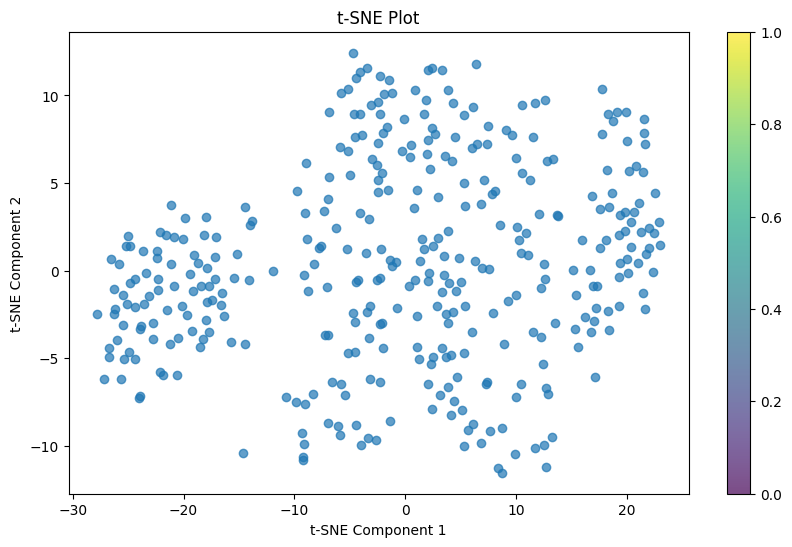

In [604]:
# Initializing t-SNE model
tsne = TSNE(n_components=2, random_state=42)

tsne_result = tsne.fit_transform(svd_projected_data_17_dimensions)

# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap='viridis', alpha=0.7)
plt.title('t-SNE Plot')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()

# Extra Work given by Sir - Add more users and movies and see which concept they map to

In [605]:
# Creating a new user
user1 = np.zeros((1, 80))

# randomly assign values from 0 to 5 for all the user array
for i in range(0, 80):
    user1[0, i] = np.random.randint(0, 6)

# generating another user whose dot product with the first user is 0
    
user2 = np.zeros((1, 80))

for i in range(0, 80):
    if(user1[0, i] == 0):
        user2[0, i] = np.random.randint(1, 6)

print(user1)
print(user2)

[[2. 5. 2. 0. 4. 0. 2. 2. 5. 5. 1. 2. 3. 4. 5. 2. 5. 2. 3. 2. 3. 3. 3. 0.
  5. 2. 0. 5. 4. 4. 4. 5. 5. 1. 5. 5. 3. 5. 5. 3. 1. 4. 5. 0. 0. 4. 1. 3.
  1. 1. 3. 2. 0. 3. 3. 3. 5. 4. 4. 1. 3. 0. 2. 3. 5. 3. 2. 1. 5. 5. 1. 2.
  5. 5. 2. 2. 1. 2. 2. 1.]]
[[0. 0. 0. 1. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.
  0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 3. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]


In [606]:
dot_similarity = np.dot(user1, user2.T)
dot_similarity

array([[0.]])

Using simple dot similarity, it is shown that user1 and user2 movie preferences are not related at all. But using SVD, we can find the hidden relation between the users in terms of the concepts of the movies they prefer.

In [607]:
user1_concept_scores = np.dot(user1, V1.T) 
user2_concept_scores = np.dot(user2, V1.T)

In [608]:
user1_concept_scores.shape

(1, 80)

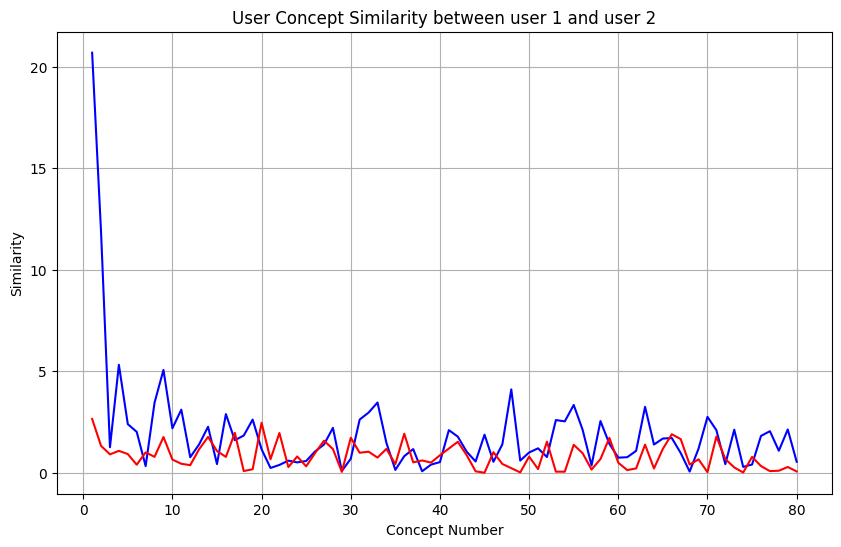

In [609]:
# plotting the user concept similarity
plt.figure(figsize=(10, 6))
plt.plot(range(1, 81), abs(user1_concept_scores[0]), color='b')
plt.plot(range(1, 81), abs(user2_concept_scores[0]), color='r')
plt.title('User Concept Similarity between user 1 and user 2')
plt.xlabel('Concept Number')
plt.ylabel('Similarity')
plt.grid(True)
plt.show()

Clearly, there is a match in the graphs. So this means there is some relation in the concepts of the movies user 1 and user 2 prefer.

In [610]:
# adding a new movie to the dataset
new_movie_1 = np.zeros((364, 1))

for i in range(0, 364):
    new_movie_1[i, 0] = np.random.randint(0, 6)

# generating another movie whose dot product with the first movie is 0
new_movie_2 = np.zeros((364, 1))

for i in range(0, 364):
    if(new_movie_1[i, 0] == 0):
        new_movie_2[i, 0] = np.random.randint(1, 6)

In [611]:
np.dot(new_movie_1.T, new_movie_2)

array([[0.]])

In [612]:
movie_1_concept_scores = np.dot(new_movie_1.T, U1)
movie_2_concept_scores = np.dot(new_movie_2.T, U1)

movie_2_concept_scores.shape

(1, 80)

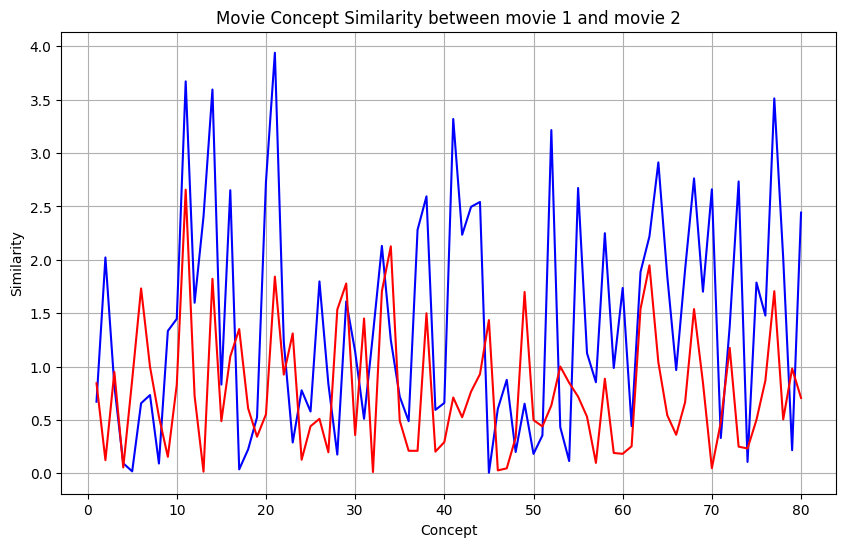

In [613]:
# plotting the movie concept similarity
plt.figure(figsize=(10, 6))
plt.plot(range(1, 81), abs(movie_1_concept_scores[0]), color='b')
plt.plot(range(1, 81), abs(movie_2_concept_scores[0]), color='r')
plt.title('Movie Concept Similarity between movie 1 and movie 2')
plt.xlabel('Concept')
plt.ylabel('Similarity')
plt.grid(True)
plt.show()

Even though the movie vectors were orthogonal, they still have some similarity in the concept space. This is the power of the SVD!